<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/model_vxvy_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx', sheet_name='label_154')

In [3]:
feature.describe()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan/i1,Fan/i2,Fan/i3,Fan/i4,Fan/i5,Fan/i6,Fan/o1,Fan/o2,Fan/o3,Fan/o4,Fan/o5,Fan/o6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,180.333333,1.883333,29.691667,0.750000,0.750000,0.500000,0.500000,0.500000,0.250000,0.750000,0.750000,0.500000,0.500000,0.500000,0.250000
std,0.501307,0.501307,97.809588,1.911479,2.035274,0.434145,0.434145,0.501307,0.501307,0.501307,0.434145,0.434145,0.434145,0.501307,0.501307,0.501307,0.434145
min,0.000000,0.000000,47.000000,0.100000,26.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,95.500000,0.375000,27.925000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,167.000000,0.950000,29.850000,1.000000,1.000000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,251.500000,3.875000,31.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,341.000000,5.300000,33.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
label.describe()

,koor_x,koor_y,Vx,Vy,Temp
count,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000
mean,54.005344,96.213542,0.015283,-0.005514,25.651682
std,35.032021,60.529928,0.058716,0.097097,3.151404
min,1.000000,6.000000,-0.428469,-2.194303,18.201416
25%,20.000000,45.000000,0.000000,-0.009981,23.531268
50%,55.000000,96.000000,0.006029,0.001129,25.356838
75%,84.000000,141.000000,0.035409,0.017831,27.980284
max,131.000000,215.000000,0.330079,0.511868,34.240810


In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []

for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame = norm(frame)
  array_y.append(frame)

In [8]:
! mkdir models

y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.6)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}')

mkdir: cannot create directory ‘models’: File exists


In [9]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [10]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [11]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((154,), (154,), (154, 48, 2), (154, 48, 2))

In [12]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

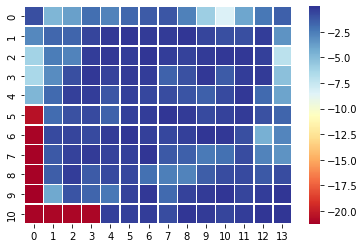

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

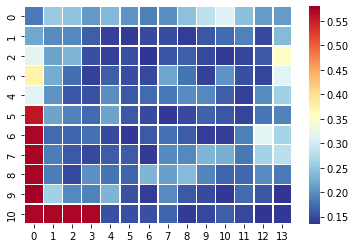

In [14]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

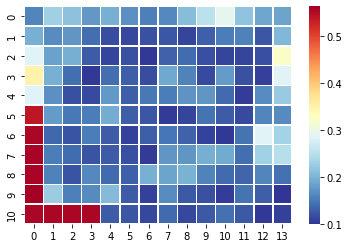

In [15]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [16]:
scenarios = 0   #0-28
indexing = 0,1    # vx,vy

In [17]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]

In [18]:
r2(a,b), mse(a,b), mae(a,b)

(0.7804465476853056, 0.01264643302304927, 0.08544250428808836)

In [19]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

In [20]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_154')

In [21]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [22]:
angin_test = kec_angin(y_testing,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [23]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [24]:
tampilan_vektor(angin_test,50,0.1)

In [25]:
tampilan_vektor(angin_pred,50,0.1)

In [26]:
!zip -r /content/models_vxvy_154_a06.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/model 108 (deflated 46%)
  adding: content/models/model 21 (deflated 44%)
  adding: content/models/model 137 (deflated 45%)
  adding: content/models/model 59 (deflated 44%)
  adding: content/models/model 148 (deflated 44%)
  adding: content/models/model 71 (deflated 45%)
  adding: content/models/model 139 (deflated 45%)
  adding: content/models/model 56 (deflated 45%)
  adding: content/models/model 66 (deflated 45%)
  adding: content/models/model 88 (deflated 45%)
  adding: content/models/model 151 (deflated 44%)
  adding: content/models/model 134 (deflated 44%)
  adding: content/models/model 122 (deflated 45%)
  adding: content/models/model 121 (deflated 45%)
  adding: content/models/model 79 (deflated 45%)
  adding: content/models/model 92 (deflated 46%)
  adding: content/models/model 75 (deflated 45%)
  adding: content/models/model 37 (deflated 44%)
  adding: content/models/model 44 (deflated 46%)
  adding: content/model